#                    Red Wine Quality Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.head(14)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Labels:

1 - fixed acidity: most acids involved with wine

2 - volatile acidity: -The amount  acetic acid in wine at too high can lead       to unpleasant taste

3 - Citric acid: citric acid can add freshnees and flavor to wines found in       very small quantities

4 - residual sugar: wine after the alcoholic fermentation finishes. It's         measured in grams per liter

5 - chlorides : Amount of sallt in wine

6 - free sulfur dioxide:  free sulfur dioxide is a key factor in                 winemaking,It's important to monitor and manage free SO2 levels to ensure     wine quality and longevity.

7 - total sulfur dioxide:Winemakers carefully monitor and manage SO2 levels       to maintain wine quality and safety.

8 - density: density of water is close to that of water dependning on the         percent of alcohol and sugar content

9 - pH: decribes how acidic and basic wine is

10 - sulphates : a wine addictive which can contribute to sulfur dioxide          gas(so2)
11 - alcohol : Alcohol Present


# Target:

Quality: Since Quality of wine is base don features and scores between 0 -10

# Exploratory Data Analysis(EDA)

In [5]:
df.shape

(1599, 12)

 Shows Shape of the Dataset

In [6]:
#checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in our Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


SO using the Describe method i can see that mean,standard value,minimum,maximum and Inter Quantile values of our Data set
 So As per my observations
 
 1.There is a gap between 75% of residual sugar and maximum residual sugar
 
 2.There is a gap betweeen 75% and max value of free sulfur dioxide
 
 3.There is a gap between 75% and max values of total sulfur dioxide
 
 All These tells us that there is an Outlier present in our dataset 
 which needs to be taken care of for better model accuracy 


In [9]:
corr = df.corr().abs()

Now , will check the multicolinearity between columns

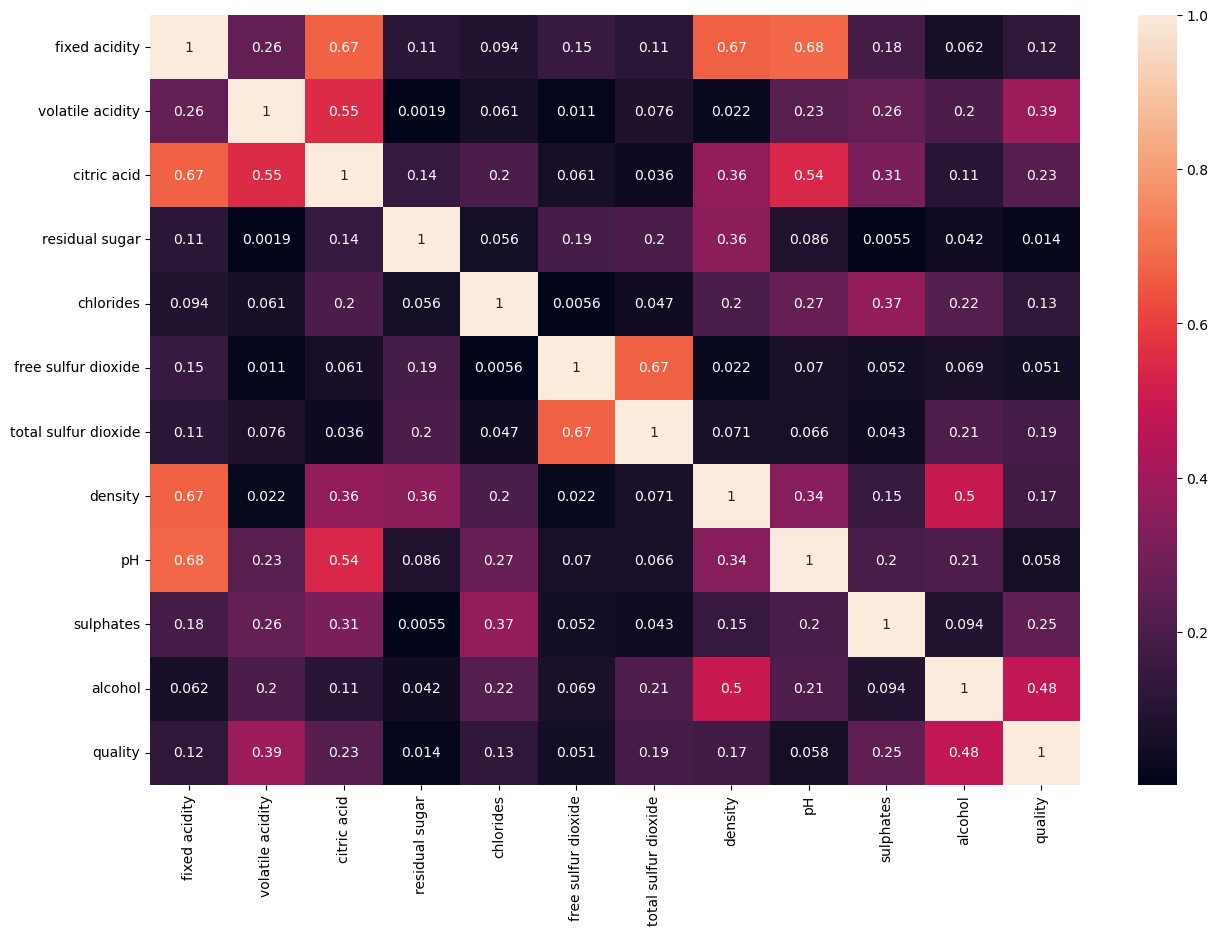

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()


In [11]:
# Seperating the labels as x and target as y
x = df.drop('quality',axis = 1)
y = df.quality

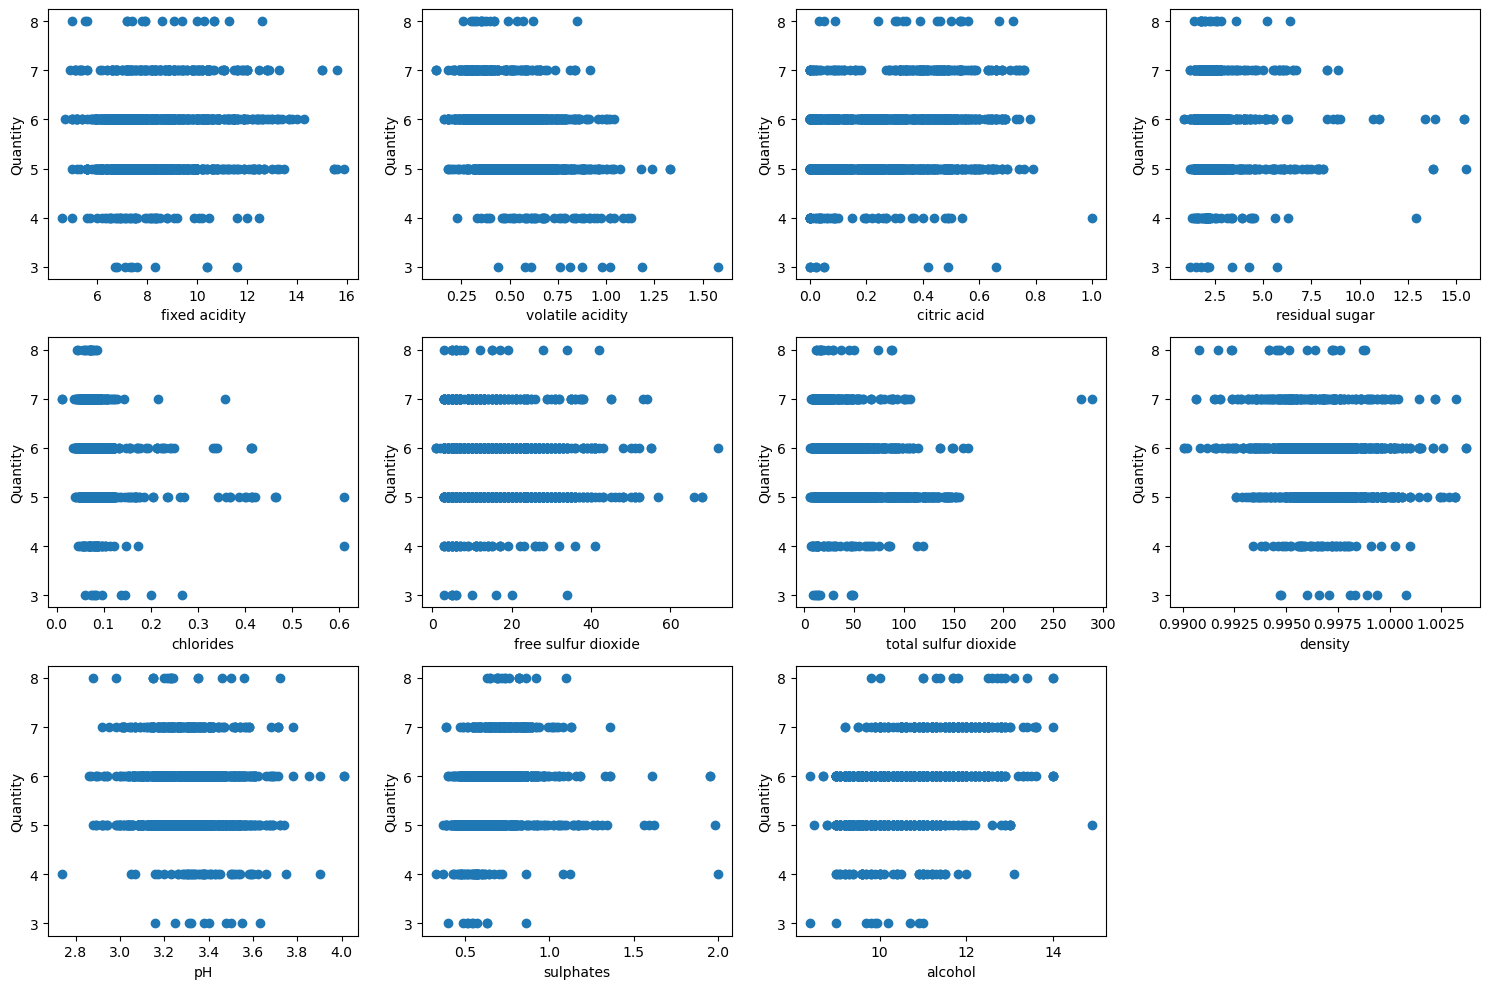

In [12]:
plt.figure(figsize=(15,10))

plotnumber = 1

for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Quantity',fontsize=10)
        plotnumber +=1
plt.tight_layout()

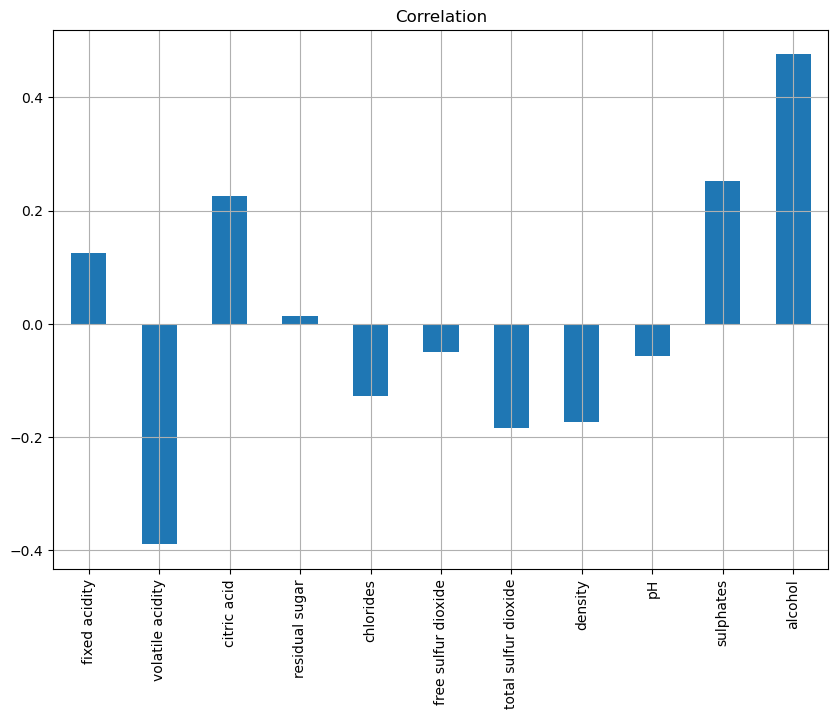

In [13]:
#Checking the realtionship between labels and target using scatterplot
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation')
plt.show()

In [14]:
best_feature = SelectKBest(score_func = f_classif, k =11)
fit = best_feature.fit(x,y)

In [15]:
bst_scores = pd.DataFrame(fit.scores_)
bst_column = pd.DataFrame(x.columns)

In [16]:
feature_score = pd.concat([bst_column,bst_scores], axis =1)
feature_score.columns = ['feature Name', 'Scores']
feature_score.nlargest(11, 'Scores')


,feature Name,Scores
10,alcohol,115.854797
1,volatile acidity,60.913993
6,total sulfur dioxide,25.478510
9,sulphates,22.273376
2,citric acid,19.690664
7,density,13.396357
0,fixed acidity,6.283081
4,chlorides,6.035639
5,free sulfur dioxide,4.754233
8,pH,4.341764


In [17]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
#Converting the data into categories i.e quality of range above and equal to 7 will be givenas 1 and below 7 will be 0
df['quality'] = [1 if x>=7 else 0 for x in df.quality]

In [19]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [21]:
x_fe = df.drop('quality', axis = 1)
y_la = df.quality

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_fe)
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

# -Train Test Split  

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y_la, test_size = 0.20, random_state = 9)

-Creating The Function for training and testing score so that we can get the result just by calling the function

In [24]:

def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n -----Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report -----\n', classification_report(y_train,y_pred))
        print('\n ----- COnfusion Matrix -----\n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result -----\n')
        print('Accuracy_Score:' , accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion Matrix -----\n' , confusion_matrix(y_test,pred))

# -Model Instantiating

In [25]:
svc = SVC()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

# -Training of the Models

In [26]:
svc.fit(x_train,y_train)
ada.fit(x_train,y_train)
knn.fit(x_train,y_train)
rfc.fit(x_train,y_train)
print('Training of all Models')

Training of all Models


# -Ploting roc_auc_curve for training


In [27]:
from sklearn.metrics import plot_roc_curve

In [28]:
if hasattr(svc, 'fit'):
    svc.fit(x_train, y_train)
else:
    print("SVC model has not been fitted. Please fit the model before plotting ROC curves.")


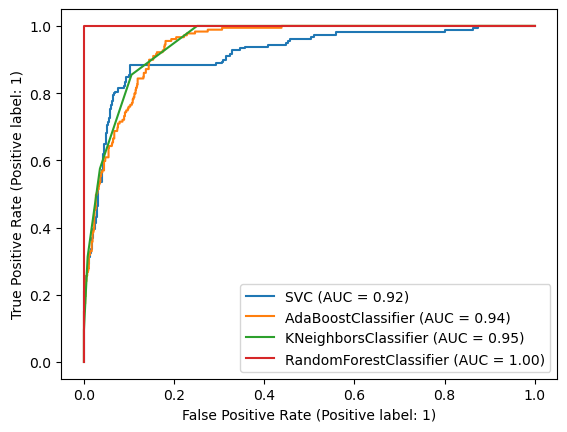

In [29]:
disp = plot_roc_curve(svc, x_train, y_train)
plot_roc_curve(ada,x_train,y_train, ax = disp.ax_)
plot_roc_curve(knn,x_train,y_train, ax = disp.ax_)
plot_roc_curve(rfc,x_train,y_train, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

In [30]:
#Traning score of each model
print(svc.score(x_train,y_train))
print(ada.score(x_train,y_train))
print(knn.score(x_train,y_train))


0.8928850664581705
0.9061767005473026
0.910086004691165


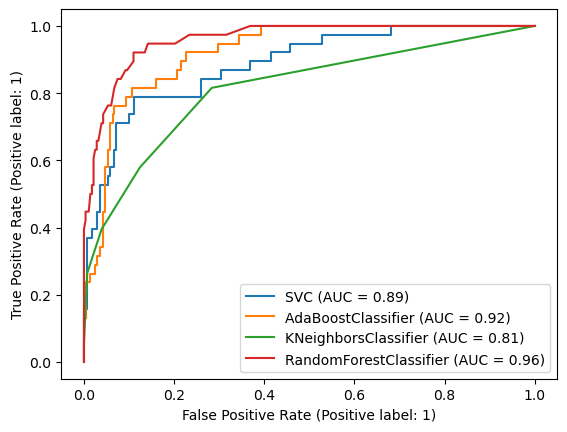

In [31]:
#Plotting roc_auc_curve for testing model
disp = plot_roc_curve(svc, x_test, y_test)
plot_roc_curve(ada,x_test,y_test,ax =disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax =disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax =disp.ax_)
plt.legend(prop ={'size' :10}, loc = 'lower right')
plt.show()

In [32]:
print(svc.score(x_test,y_test))
print(ada.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(rfc.score(x_test,y_test))

0.9125
0.896875
0.89375
0.928125


In [33]:
# Training score, Testing Score, Classification Report, Confusion matrix of RandomForestClassifier
rfc.fit(x_train, y_train)
score(rfc, x_train, x_test, y_train, y_test, train = True)
score(rfc, x_train, x_test, y_train, y_test, train = False)



 -----Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report -----
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1100
           1       1.00      1.00      1.00       179

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


 ----- COnfusion Matrix -----
 [[1100    0]
 [   0  179]]

 ----- Test Result -----

Accuracy_Score: 0.928125

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       282
           1       0.83      0.50      0.62        38

    accuracy                           0.93       320
   macro avg       0.88      0.74      0.79       320
weighted avg       0.92      0.93      0.92       320


 ----- Confusion Matrix -----
 [[278   4]
 [ 19  19]]


In [34]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [35]:
# Hyperparameter Tuning
param = {
    'n_estimators': range(1, 15),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 10),
    'max_features': range(0, 12),
    'max_leaf_nodes': range(2, 4)
}


In [36]:
grid = GridSearchCV(rfc,param_grid = param)
grid.fit(x_train,y_train)
print('Best Params =', grid.best_params_)

Best Params = {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'max_leaf_nodes': 3, 'n_estimators': 4}


In [37]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7,max_features =11,max_leaf_nodes=5,n_estimators=7)

In [41]:
rfc.fit(x_train,y_train)
score(rfc,x_train,x_test,y_train,y_test,train = True)
score(rfc,x_train,x_test,y_train,y_test,train = False)


 -----Train Result ----- 

Accuracy Score: 0.8866301798279906

 ----- Classification Report -----
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1100
           1       0.70      0.34      0.45       179

    accuracy                           0.89      1279
   macro avg       0.80      0.66      0.69      1279
weighted avg       0.87      0.89      0.87      1279


 ----- COnfusion Matrix -----
 [[1074   26]
 [ 119   60]]

 ----- Test Result -----

Accuracy_Score: 0.896875

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94       282
           1       0.69      0.24      0.35        38

    accuracy                           0.90       320
   macro avg       0.80      0.61      0.65       320
weighted avg       0.88      0.90      0.87       320


 ----- Confusion Matrix -----
 [[278   4]
 [ 29   9]]


In [42]:
#USing Pickle Method
filename = 'winequality.ipynb'
pickle.dump(rfc,open(filename, 'wb'))